In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import pprint

import folium
from folium.plugins import MarkerCluster
import googlemaps
import geopandas as gpd

import requests
import json
import time

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
bus_time_table = pd.read_csv('./datasets/bus_time_table.csv', encoding='cp949', sep=',', parse_dates=['기준_날짜'])
bus_time_table.isna().sum()

기준_날짜            0
행정동_ID           0
버스_승객_수        424
버스_승객_수_00시    424
버스_승객_수_01시    424
버스_승객_수_02시    424
버스_승객_수_03시    424
버스_승객_수_04시    424
버스_승객_수_05시    424
버스_승객_수_06시    424
버스_승객_수_07시    424
버스_승객_수_08시    424
버스_승객_수_09시    424
버스_승객_수_10시    424
버스_승객_수_11시    424
버스_승객_수_12시    424
버스_승객_수_13시    424
버스_승객_수_14시    424
버스_승객_수_15시    424
버스_승객_수_16시    424
버스_승객_수_17시    424
버스_승객_수_18시    424
버스_승객_수_19시    424
버스_승객_수_20시    424
버스_승객_수_21시    424
버스_승객_수_22시    424
버스_승객_수_23시    424
dtype: int64

In [3]:
# 결측치 2022-12-18 삭제
del_idx = bus_time_table[bus_time_table.isna().values == True].index
bus_time_table = bus_time_table.drop(del_idx, axis=0)
bus_time_table.isna().sum()

기준_날짜          0
행정동_ID         0
버스_승객_수        0
버스_승객_수_00시    0
버스_승객_수_01시    0
버스_승객_수_02시    0
버스_승객_수_03시    0
버스_승객_수_04시    0
버스_승객_수_05시    0
버스_승객_수_06시    0
버스_승객_수_07시    0
버스_승객_수_08시    0
버스_승객_수_09시    0
버스_승객_수_10시    0
버스_승객_수_11시    0
버스_승객_수_12시    0
버스_승객_수_13시    0
버스_승객_수_14시    0
버스_승객_수_15시    0
버스_승객_수_16시    0
버스_승객_수_17시    0
버스_승객_수_18시    0
버스_승객_수_19시    0
버스_승객_수_20시    0
버스_승객_수_21시    0
버스_승객_수_22시    0
버스_승객_수_23시    0
dtype: int64

In [4]:
# 승객수 시간별 총합이 버스 승객수가 맞는지 확인
bus_time_table[bus_time_table[['버스_승객_수_00시', '버스_승객_수_01시',
       '버스_승객_수_02시', '버스_승객_수_03시', '버스_승객_수_04시', '버스_승객_수_05시',
       '버스_승객_수_06시', '버스_승객_수_07시', '버스_승객_수_08시', '버스_승객_수_09시',
       '버스_승객_수_10시', '버스_승객_수_11시', '버스_승객_수_12시', '버스_승객_수_13시',
       '버스_승객_수_14시', '버스_승객_수_15시', '버스_승객_수_16시', '버스_승객_수_17시',
       '버스_승객_수_18시', '버스_승객_수_19시', '버스_승객_수_20시', '버스_승객_수_21시',
       '버스_승객_수_22시', '버스_승객_수_23시']].sum(axis=1) != bus_time_table['버스_승객_수']]

,기준_날짜,행정동_ID,버스_승객_수,버스_승객_수_00시,버스_승객_수_01시,버스_승객_수_02시,버스_승객_수_03시,버스_승객_수_04시,버스_승객_수_05시,버스_승객_수_06시,...,버스_승객_수_14시,버스_승객_수_15시,버스_승객_수_16시,버스_승객_수_17시,버스_승객_수_18시,버스_승객_수_19시,버스_승객_수_20시,버스_승객_수_21시,버스_승객_수_22시,버스_승객_수_23시


In [5]:
# 컬럼명 변경
bus = pd.DataFrame()
bus['busdate'] = bus_time_table['기준_날짜']
bus['yy'] = bus_time_table['기준_날짜'].dt.year
bus['mm'] = bus_time_table['기준_날짜'].dt.month
bus['dd'] = bus_time_table['기준_날짜'].dt.day
bus['dong_id'] = bus_time_table['행정동_ID']
bus['guest_cnt'] = bus_time_table['버스_승객_수']
bus[['hh00', 'hh01',
       'hh02', 'hh03', 'hh04', 'hh05',
       'hh06', 'hh07', 'hh08', 'hh09',
       'hh10', 'hh11', 'hh12', 'hh13',
       'hh14', 'hh15', 'hh16', 'hh17',
       'hh18', 'hh19', 'hh20', 'hh21',
       'hh22', 'hh23']] = bus_time_table[['버스_승객_수_00시', '버스_승객_수_01시',
       '버스_승객_수_02시', '버스_승객_수_03시', '버스_승객_수_04시', '버스_승객_수_05시',
       '버스_승객_수_06시', '버스_승객_수_07시', '버스_승객_수_08시', '버스_승객_수_09시',
       '버스_승객_수_10시', '버스_승객_수_11시', '버스_승객_수_12시', '버스_승객_수_13시',
       '버스_승객_수_14시', '버스_승객_수_15시', '버스_승객_수_16시', '버스_승객_수_17시',
       '버스_승객_수_18시', '버스_승객_수_19시', '버스_승객_수_20시', '버스_승객_수_21시',
       '버스_승객_수_22시', '버스_승객_수_23시']].astype('int')
bus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173416 entries, 0 to 173839
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   busdate    173416 non-null  datetime64[ns]
 1   yy         173416 non-null  int64         
 2   mm         173416 non-null  int64         
 3   dd         173416 non-null  int64         
 4   dong_id    173416 non-null  int64         
 5   guest_cnt  173416 non-null  float64       
 6   hh00       173416 non-null  int32         
 7   hh01       173416 non-null  int32         
 8   hh02       173416 non-null  int32         
 9   hh03       173416 non-null  int32         
 10  hh04       173416 non-null  int32         
 11  hh05       173416 non-null  int32         
 12  hh06       173416 non-null  int32         
 13  hh07       173416 non-null  int32         
 14  hh08       173416 non-null  int32         
 15  hh09       173416 non-null  int32         
 16  hh10       173416 no

In [149]:
bus.sort_values('busdate').to_csv('./datasets/bus.csv', index=False)

In [152]:
bus = pd.read_csv('./datasets/bus.csv')
bus

,busdate,yy,mm,dd,dong_id,guest_cnt,hh00,hh01,hh02,hh03,...,hh14,hh15,hh16,hh17,hh18,hh19,hh20,hh21,hh22,hh23
0,2022-01-01,2022,1,1,1115065,1353.0,5,0,0,0,...,95,130,107,102,77,45,91,92,53,21
1,2022-01-01,2022,1,1,1109071,16257.0,83,17,5,3,...,1093,1249,1356,1448,1305,953,1006,1535,844,367
2,2022-01-01,2022,1,1,1109064,3696.0,12,2,0,0,...,318,262,273,269,224,167,153,199,105,44
3,2022-01-01,2022,1,1,1109060,11780.0,78,19,4,2,...,716,831,879,856,810,737,835,1288,675,318
4,2022-01-01,2022,1,1,1108081,6597.0,10,0,1,0,...,482,560,558,608,475,270,382,377,200,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173411,2023-02-15,2023,2,15,1104052,4173.0,19,11,10,4,...,197,236,181,242,220,220,181,169,157,77
173412,2023-02-15,2023,2,15,1101060,2033.0,0,0,0,0,...,120,147,159,189,160,86,69,41,28,6
173413,2023-02-15,2023,2,15,1101058,10620.0,56,16,12,7,...,608,764,858,969,995,673,603,498,516,179
173414,2023-02-15,2023,2,15,1101055,8227.0,20,0,0,0,...,515,556,658,726,676,448,304,211,185,63


In [7]:
# 중구 22년 3월만
bus_mm03 = bus[(bus['dong_id']//100==11020)&(bus['mm']==3)].sort_values(['busdate'])
bus_mm03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 149193 to 136194
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   busdate    465 non-null    datetime64[ns]
 1   yy         465 non-null    int64         
 2   mm         465 non-null    int64         
 3   dd         465 non-null    int64         
 4   dong_id    465 non-null    int64         
 5   guest_cnt  465 non-null    float64       
 6   hh00       465 non-null    int32         
 7   hh01       465 non-null    int32         
 8   hh02       465 non-null    int32         
 9   hh03       465 non-null    int32         
 10  hh04       465 non-null    int32         
 11  hh05       465 non-null    int32         
 12  hh06       465 non-null    int32         
 13  hh07       465 non-null    int32         
 14  hh08       465 non-null    int32         
 15  hh09       465 non-null    int32         
 16  hh10       465 non-null    int32    

In [132]:
# 서울geojson을 중구geojson으로 잘라서 저장

# state_geo = gpd.read_file('./datasets/seoul_geo_dong.geojson')
# junggu_geo = state_geo[ state_geo['adm_cd'].astype('int')//100 == 11020 ]

# with open('C:\\AI\\pythonProject\\venv\\lecture\\semipjt\\datasets\\junggu_geo.geojson', 'w') as f:
#     f.write(junggu_geo.to_json(drop_id=True))

In [129]:
# state_geo = gpd.read_file('./datasets/seoul_geo_dong.geojson')
# junggu_geo = state_geo[ state_geo['adm_cd'].astype('int')//100 == 11020 ]
# junggu_geo

# here = [37.560914, 126.990202]
# m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

# folium.GeoJson(junggu_geo).add_to(m)
# m

In [15]:
# state_geo = gpd.read_file('./datasets/seoul_geo_sigugun.json')
# seoul_ingu = pd.read_csv("./datasets/주민등록인구_20230222161234.csv", sep='\t', encoding='cp949')

# here = [37.560914, 126.990202]
# m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

# m.choropleth(
#     geo_data=state_geo,
#     data=seoul_ingu,
#     columns=['동별', '총계'],
#     key_on='feature.properties.name')
# m

In [133]:
junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
bus_3month_dong_tot = pd.read_csv('./datasets/bus_3month_dong_tot.csv')

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=bus_3month_dong_tot,
    columns=['dong_id', 'guest_cnt'],
    key_on='feature.properties.adm_cd')
m

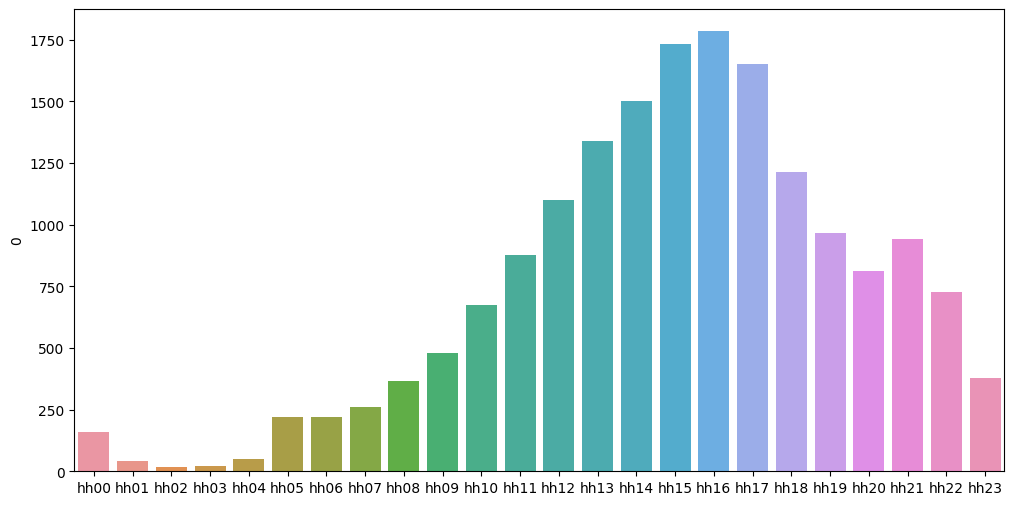

In [138]:
# 3월1일의 24시간 그래프

plt.figure(figsize=(12,6))

며칠 = 1
동 = 1102054
bus_mm03_dd01_1102054 = bus_mm03[(bus_mm03['dd']==며칠)&(bus_mm03['dong_id']==동)]
bus_mm03_dd01_1102054
time_list = bus_mm03_dd01_1102054.iloc[0, 6:]
dd= pd.DataFrame(time_list.values, index=time_list.index)
# plt.ylim(0,3000)
sns.barplot(dd, x=dd.index, y=dd[0])
plt.show()

In [ ]:
###################

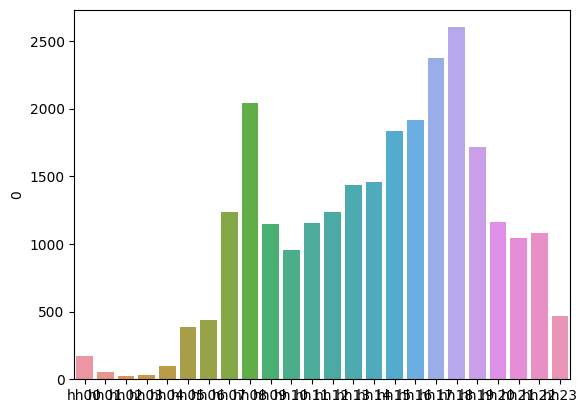

In [86]:
dd= pd.DataFrame(time_list.values, index=time_list.index)
sns.barplot(dd, x=dd.index, y=dd[0])
plt.show()

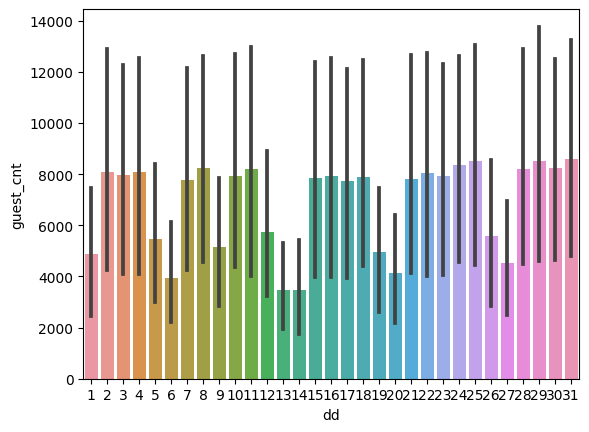

In [140]:
sns.barplot(data=bus_mm03, x='dd', y='guest_cnt')
plt.show()